In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Filtry cyfrowe

## FIR - SOI

Filtry o skończonej odpowiedzi impulsowej wykonują operację splotu z zestawem parametrów definiujących dany filtr. Powiedzmy, że mamy sygnał o określonej częstotliwości 2 Hz zaszumiony szumem białym o niskiej amplitudzie.

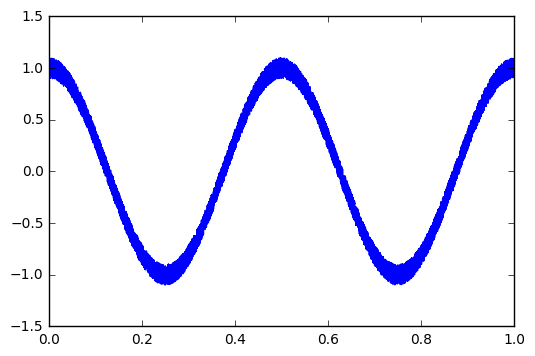

In [16]:
Fs = 10000
T = 1
t = arange(0, T, 1.0/Fs)

y = cos(2*pi*2*t)

noise = (random.random(y.shape)*2 - 1) * 0.1
yn = y + noise

plot(t, yn)

W jaki sposób się możemy pozbyć szumu? Spróbujmy użyć operacji splotu żeby dla każdej próbki wyliczyć średnią $N$ poprzednich próbek (dla określonego $N$). Zróbmy więc sygnał składający się z liczby $\frac{1}{N}$ powtórzonej $N$ razy. Wyliczmy splot zaszumionego sygnału z tym sygnałem i narysujmy wynik.

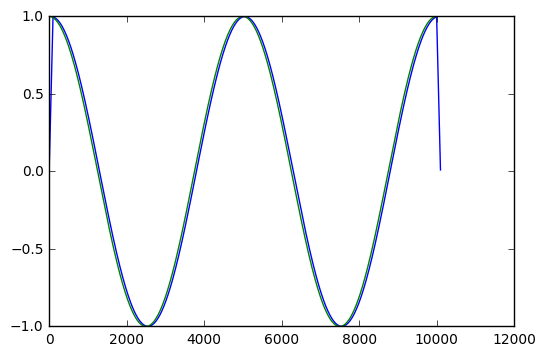

In [35]:
N = 100
h = ones(N) / N

yo = convolve(y, h)

plot(yo)
plot(y)

Zobaczmy co ten zestaw współczynników robi w dziedzinie częstotliwości. Wykonaj transformatę Fouriera i narysuj widmo amplitudowe i fazowe. Żeby otrzymać większą "rozdzielczość" dodaj mnóstwo zer na końcu sygnału. Co robi ten filtr? Sprawdź też funkcję *scipy.signal.freqz*.

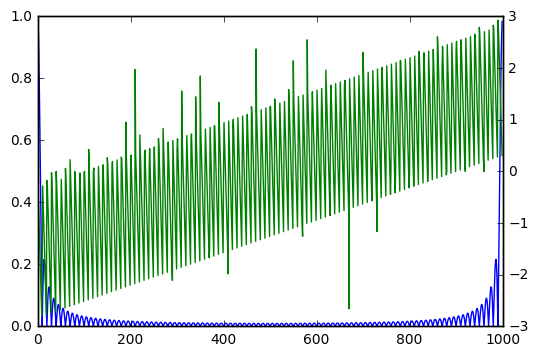

In [36]:
h_hires = zeros(1000)
h_hires[:h.size] = h
H = fft.fft(h_hires)

plot(abs(H), 'b')
twinx()
plot(angle(H), 'g')

In [7]:
from scipy.signal import freqz



Użyjmy teraz funkcji Gaussowskiej, zamiast serii tej samej liczby (właściwie funkcji prostokątnej). Znajdziesz ją w *scipy.signal.gaussian*. Jakie ona ma widmo?

In [6]:
from scipy.signal import gaussian

N = 100
h = gaussian(N, 10)

yo = convolve(yn, h)

plot(yo)


NameError: name 'yn' is not defined

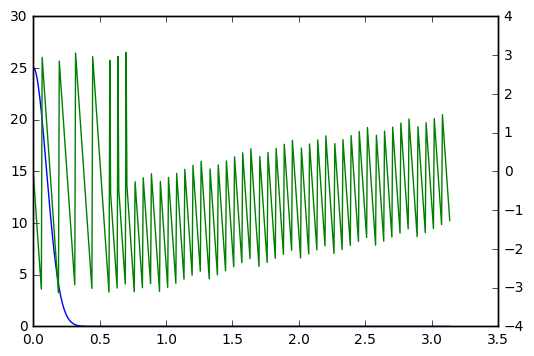

In [54]:
f, H = freqz(h)

plot(f, abs(H), 'b')
twinx()
plot(f, angle(H), 'g')

Spróbuj teraz funkcę *np.sinc*.

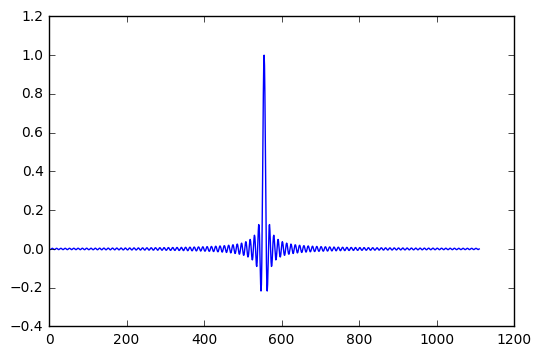

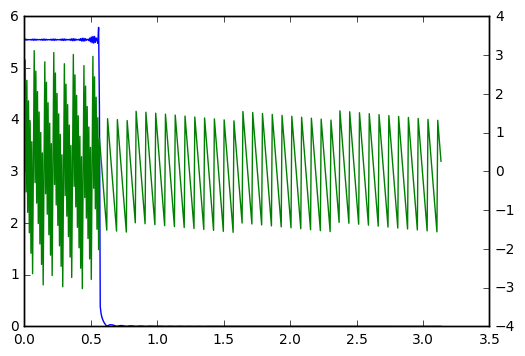

In [71]:
N = 1111
h = sinc(linspace(-100, 100, N))

plot(h)

f, H = freqz(h)

figure()
plot(f, abs(H), 'b')
twinx()
plot(f, angle(H), 'g')

Wszystkie poprzednie filtry, to filtry dolno-przepustowe. Jak zrobić górno przepustowy? Spróbuj odwrócić znak co drugiego elementu sygnału.

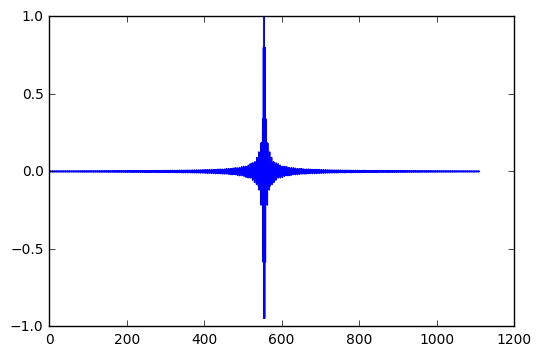

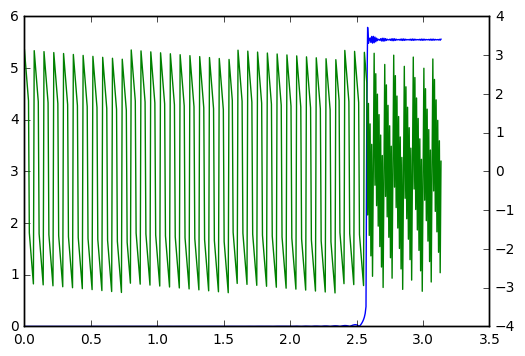

In [70]:
N = 1111
h = sinc(linspace(-100, 100, N))

h[::2] *= -1
plot(h)

f, H = freqz(h)

figure()
plot(f, abs(H), 'b')
twinx()
plot(f, angle(H), 'g')

Zróbmy połączenie dwóch filtrów (dolno i górno przepustowego). Do tego wystarczy zrobić sumę w dziedzinie częstotliowości, czyli również sumę w dziedzinie czasu.

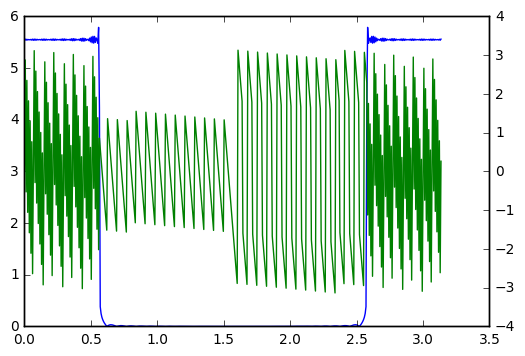

In [72]:
N = 1111
hlo = sinc(linspace(-100, 100, N))

hhi = copy(hlo)
hhi[::2] *= -1

h = hhi + hlo

f, H = freqz(h)

figure()
plot(f, abs(H), 'b')
twinx()
plot(f, angle(H), 'g')

Weźmy teraz sygnał sinusowy o określonej częstotliwości jako współczynniki filtru. Co otrzymaliśmy?

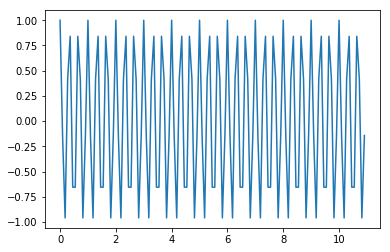

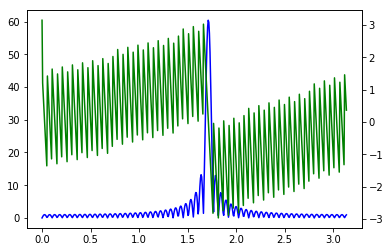

In [12]:
N = 11
f = 3
t = arange(0, N, 1/N)
h = cos(2*pi*f*t)

plot(t, h)

f, H = freqz(h)

figure()
plot(f, abs(H), 'b')
twinx()
plot(f, angle(H), 'g')

Użyj funkcji *scipy.signal.firwin* żeby wygnereować filtr z wybranej funkcji okienkowej.

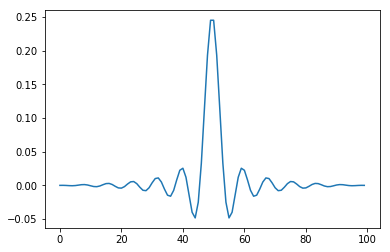

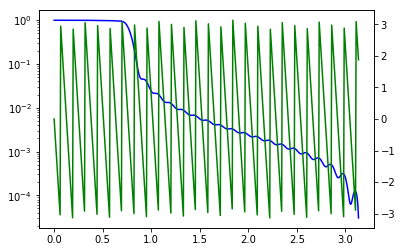

In [19]:
from scipy.signal import firwin

N = 100
h = firwin(N, 0.25, window="bartlett")

plot(h)

f, H = freqz(h)

figure()
plot(f, abs(H), 'b')
yscale("log")
twinx()
plot(f, angle(H), 'g')

## IIR - NOI

Filtry IIR są bardziej skomplikowane, ponieważ złe współczynniki mogą spowodować niestabilność układu (poprzez efekt *feedback*). Zaprojektuj filtr IIR za pomocą funkcji *scipy.signal.butter*. Użyj funkcji *scipy.signal.freqz* żeby obejrzeć jego widma, a *scipy.signal.lfilter* żeby zastosować filtr na sygnale.

Sensownymi wartościami filtru Butterwortha to $N=19$ i $W_n=0.5$.

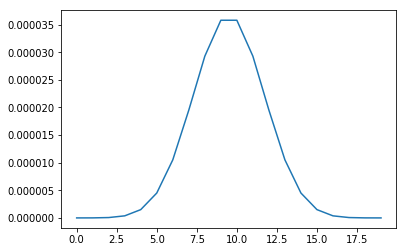

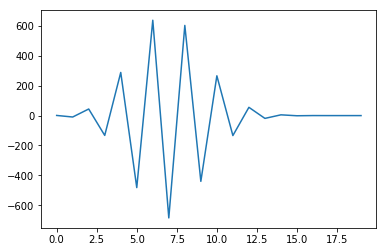

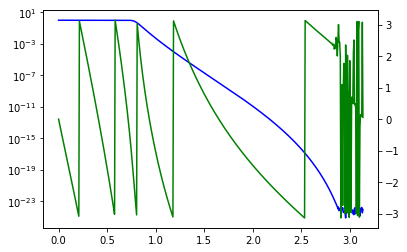

In [29]:
from scipy.signal import butter

b, a = butter(19, 0.25)

plot(b)
figure()
plot(a)

f, H = freqz(b, a)

figure()
plot(f, abs(H), 'b')
yscale("log")
twinx()
plot(f, angle(H), 'g')

Spróbuj filtr eliptyczny używając funkcji *scipy.signal.ellip* z parametrami $N=10$, $rp=0.1$, $rs=10$ i $Wn=0.5$.

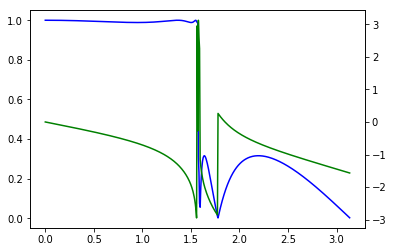

In [62]:
from scipy.signal import ellip

b, a = ellip(11, 0.1, 10, 0.5)

# plot(b)
# figure()
# plot(a)

f, H = freqz(b, a)

figure()
plot(f, abs(H), 'b')
# yscale("log")
twinx()
plot(f, angle(H), 'g')

Policz odpowiedź impulsową tego filtru.

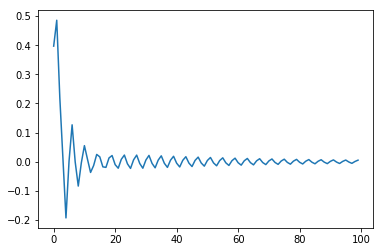

In [63]:
from scipy.signal import lfilter

i = zeros(100)
i[0] = 1

h = lfilter(b, a, i)
plot(h)

Sprawdź czy filtr jest stabilny. Filtr IIR jest stabilny jeśli wartości bezwględne pierwiastków jego współczynników mianownikowych są mniejsze od 1. Do policzenia pierwiastków można użyć funkcji *np.roots*.

In [64]:
# a[6] = 30

r = roots(a)

r = abs(r)

print(max(r))
print(all(r < 1))

0.999978597702
True


Narysuj wykres zer i bigunów (pole/zero plot) do wybranego filtru. Do narysowania okręgu jednostowego użyj funkcji z biblioteki *matplotlib.patches*,np

```
ax.add_patch(patches.Circle((0,0), radius=1, fill=True, color='black', ls='dashed', alpha=0.5))
```

Do wyliczenia współczynników zer i biegunów, możesz użyć funkcji *scipy.signal.tf2zpk*.


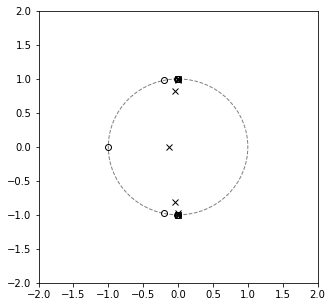

In [65]:
from matplotlib import patches
from scipy.signal import tf2zpk

figure(figsize=(5, 5))
ax = subplot(1, 1, 1)

ax.add_patch(patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed', alpha=0.5))
xlim(-2, 2)
ylim(-2, 2)

z, p, k = tf2zpk(b, a)

plot(z.real, z.imag, "ok", fillstyle="none", markeredgecolor="black")
plot(p.real, p.imag, "xk")

Text(0.5,1,'Filtr')

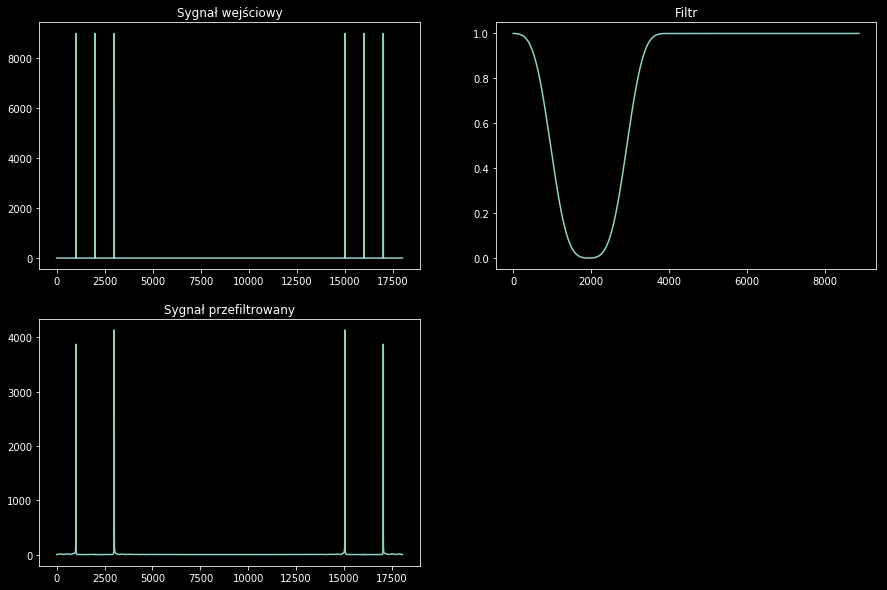

In [6]:
from scipy.signal import freqz
 
Fs = 18000
x = arange(0, 1, 1/Fs)
s = sin(2*pi*1000*x) + sin(2*pi*2000*x) + sin(2*pi*3000*x)
S = fft.fft(s)
    
fL = 0.054 
fH = 0.164
b = 0.08
N = int(ceil((4 / b)))
if not N % 2: N += 1
n = arange(N)
 
# low pass
hlpf = np.sinc(2 * fL * (n - (N - 1) / 2.))
hlpf *= blackman(N)
hlpf /= sum(hlpf)
 
# high pass
hhpf = np.sinc(2 * fH * (n - (N - 1) / 2.))
hhpf *= blackman(N)
hhpf /= sum(hhpf)
hhpf = -hhpf
hhpf[(N - 1) // 2] += 1
 
h = hlpf + hhpf
f, H = freqz(h)
f_un = f*pi*Fs/20
H_fft = fft.fft(h)

s2 = convolve(s, h)
S2 = fft.fft(s2)

style.use("dark_background")
figure(figsize=(15, 10))
subplot(221)
plot(abs(S))
title("Sygnał wejściowy")
subplot(223)
plot(abs(S2))
title("Sygnał przefiltrowany")
subplot(222)
plot(f_un, abs(H))
title("Filtr")

# Praca domowa

## 1. Filtr SOI

Zrób sygnał z trzema sygnałami: 1 kHz, 2kHz i 3 kHz. Zrób filtr który usunie składową 2 kHz.

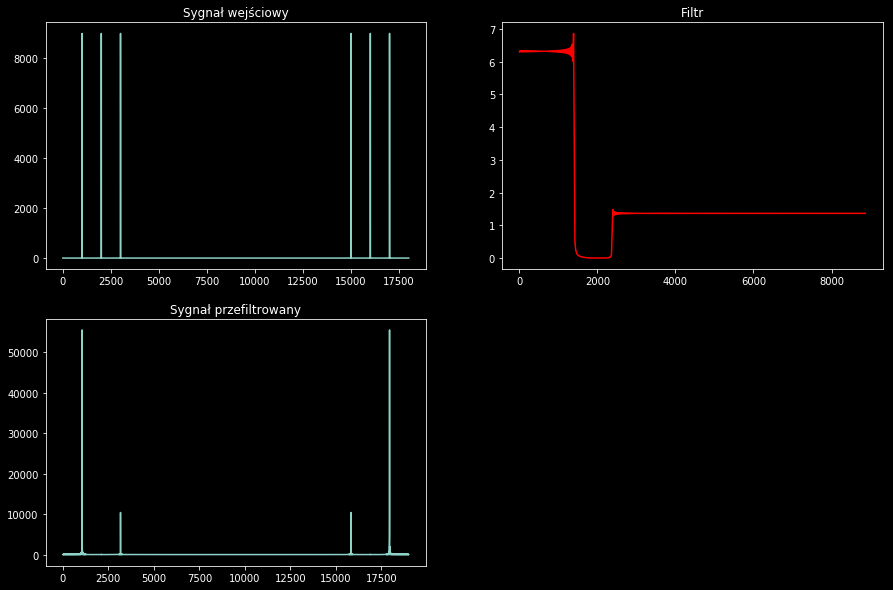

In [37]:
from scipy.signal import freqz

T = 1
Fs = 18000
t = arange(0, T, 1/Fs)
y = sin(2*pi*1000*t) + sin(2*pi*2000*t) + sin(2*pi*3000*t)

Y = fft.fft(y)

style.use('dark_background')
figure(figsize(15, 10))
subplot(221)
plot(abs(Y))
title("Sygnał wejściowy")

N = 1011
b = 80
hlo = sinc(linspace(-b, b, N))

N = 1011
b = 370
hhi = sinc(linspace(-b, b, N))
hhi[::2] *= -1

h = hhi + hlo

f, H = freqz(h)
f_un = pi*f*Fs/20

subplot(222)
plot(f_un, abs(H), 'r')
# twinx()
# plot(f, angle(H), 'gray')
title("Filtr")

y2 = convolve(y, h)
Y2 = fft.fft(y2)

subplot(223)
plot(abs(Y2))
_=title("Sygnał przefiltrowany")

## 2. Filtr NOI

Użyj tego samego sygnału co powyżej, ale zastosuj filtr NOI. Sprawdź czy filtr jest na pewno stabilny.

Text(0.5,1,'ROC')

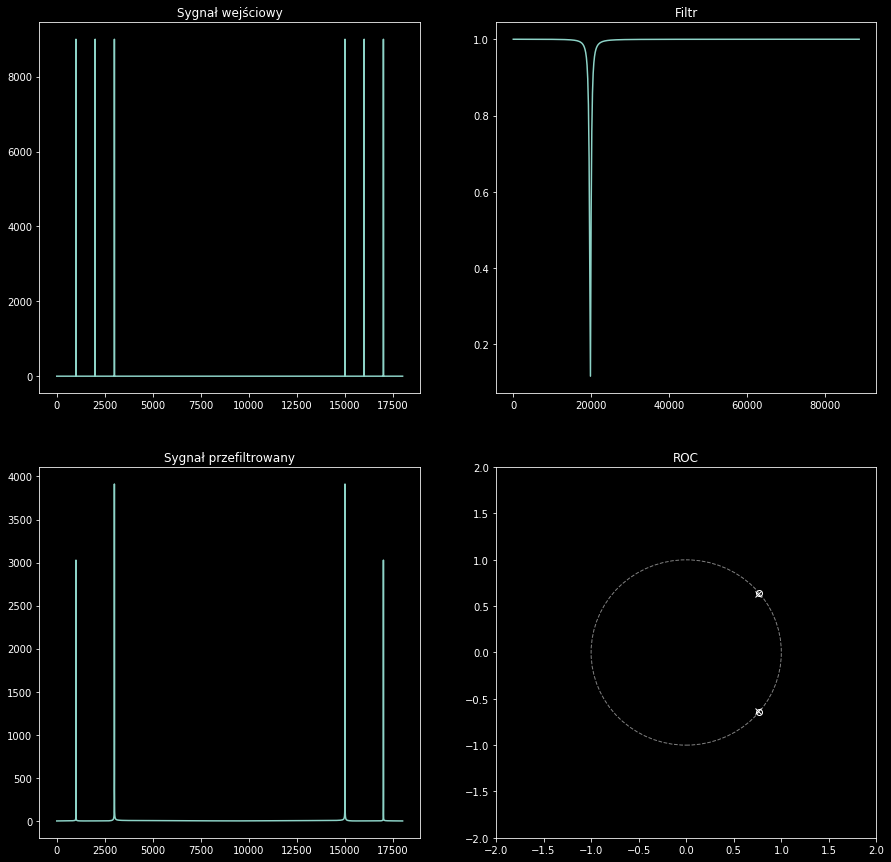

In [8]:
from scipy.signal import freqz, iirnotch

fs = 18000
x = arange(0, 1, 1/fs)
s = sin(2*pi*1000*x) + sin(2*pi*2000*x) + sin(2*pi*3000*x)
S = fft.fft(s)

f0 = 2000.0 
Q = 30.0
w0 = f0/(fs/2) # normalize

b, a = iirnotch(w0, Q)

w, h = freqz(b, a)
w_un = w*pi*fs/2

s2 = convolve(s, b)
S2 = fft.fft(s2)

style.use("dark_background")
figure(figsize=(15, 15))
subplot(221)
plot(abs(S))
title("Sygnał wejściowy")
subplot(223)
plot(abs(S2))
title("Sygnał przefiltrowany")
subplot(222)
plot(w_un, abs(h))
title("Filtr")

from matplotlib import patches
from scipy.signal import tf2zpk


ax = subplot(224)

ax.add_patch(patches.Circle((0,0), radius=1, fill=False, color='white', ls='dashed', alpha=0.5))
xlim(-2, 2)
ylim(-2, 2)

z, p, k = tf2zpk(b, a)

plot(z.real, z.imag, "ok", fillstyle="none", markeredgecolor="white")
plot(p.real, p.imag, "xw")
title("ROC")

Zera i bieguny znajdują się wewnątrz obszaru zbieżności, więc filtr jest stabilny.